In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML

In [2]:
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.models import Model,Sequential
from keras.optimizers import Adam,SGD,RMSprop

In [3]:
import tensorflow as tf
import os
import random
import numpy as np
 
from tqdm import tqdm 

from skimage.io import imread, imshow
from skimage.transform import resize
import matplotlib.pyplot as plt

In [4]:
BATCH_SIZE = 32
IMAGE_SIZE = 128
CHANNELS=3
EPOCHS=25

In [5]:
from PIL import Image
import os
images_dir_path='Train/WithMask/'

def image_rescaling(path):
    for img in os.listdir(path):
        img_dir=os.path.join(path,img)
        img = Image.open(img_dir)
        img = img.resize((128, 128)) 
        img.save(img_dir)
image_rescaling(images_dir_path)

In [6]:
from PIL import Image
import os
images_dir_path='Train/WithoutMask/'

def image_rescaling(path):
    for img in os.listdir(path):
        img_dir=os.path.join(path,img)
        img = Image.open(img_dir)
        img = img.resize((128, 128)) 
        img.save(img_dir)
image_rescaling(images_dir_path)

In [7]:
from PIL import Image
import os
images_dir_path='Test/WithoutMask/'

def image_rescaling(path):
    for img in os.listdir(path):
        img_dir=os.path.join(path,img)
        img = Image.open(img_dir)
        img = img.resize((128, 128)) 
        img.save(img_dir)
image_rescaling(images_dir_path)

In [8]:
from PIL import Image
import os
images_dir_path='Test/WithMask/'

def image_rescaling(path):
    for img in os.listdir(path):
        img_dir=os.path.join(path,img)
        img = Image.open(img_dir)
        img = img.resize((128, 128)) 
        img.save(img_dir)
image_rescaling(images_dir_path)

In [9]:
from PIL import Image
import os
images_dir_path='Validation/WithoutMask/'

def image_rescaling(path):
    for img in os.listdir(path):
        img_dir=os.path.join(path,img)
        img = Image.open(img_dir)
        img = img.resize((128, 128)) 
        img.save(img_dir)
image_rescaling(images_dir_path)

In [10]:
from PIL import Image
import os
images_dir_path='Validation/WithMask/'

def image_rescaling(path):
    for img in os.listdir(path):
        img_dir=os.path.join(path,img)
        img = Image.open(img_dir)
        img = img.resize((128, 128)) 
        img.save(img_dir)
image_rescaling(images_dir_path)

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True
)
train_dataset = train_datagen.flow_from_directory(
        'Train',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode='categorical'
)

Found 10000 images belonging to 2 classes.


In [12]:
train_dataset.class_indices

{'WithMask': 0, 'WithoutMask': 1}

In [13]:
class_names = list(train_dataset.class_indices.keys())
class_names

['WithMask', 'WithoutMask']

In [14]:
count=0
for image_batch, label_batch in train_dataset:
#     print(label_batch)
    print(image_batch[0])
    break

[[[0.48531678 0.2901961  0.24217951]
  [0.48574114 0.2901961  0.24260387]
  [0.4861655  0.2901961  0.24302822]
  ...
  [0.8745099  0.5635194  0.512539  ]
  [0.8745099  0.56078434 0.50980395]
  [0.87747365 0.5637481  0.51276773]]

 [[0.4935697  0.2976739  0.25043243]
  [0.48847747 0.29427907 0.24534018]
  [0.4833852  0.29088426 0.24024795]
  ...
  [0.8745099  0.5622464  0.511266  ]
  [0.8745099  0.56078434 0.50980395]
  [0.87789804 0.5641725  0.5131921 ]]

 [[0.5394405  0.32703885 0.29447985]
  [0.5347726  0.32449275 0.29066065]
  [0.5301047  0.32194662 0.28684145]
  ...
  [0.8745099  0.56097335 0.5099929 ]
  [0.8745099  0.56078434 0.50980395]
  [0.8783224  0.5645969  0.5136165 ]]

 ...

 [[0.80392164 0.2901961  0.09411766]
  [0.80392164 0.29011008 0.09411766]
  [0.80366963 0.2857076  0.09411766]
  ...
  [0.5294748  0.43529415 0.3137255 ]
  [0.5298991  0.43529415 0.3137255 ]
  [0.5303235  0.43529415 0.3137255 ]]

 [[0.80392164 0.2901961  0.09411766]
  [0.80392164 0.28968573 0.09411766]


In [15]:
validation_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)
validation_dataset = validation_datagen.flow_from_directory(
        'Validation',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode='categorical'
)

Found 800 images belonging to 2 classes.


In [16]:
for image_batch, label_batch in validation_dataset:
    print(image_batch[0])
    break

[[[0.9012929  0.9012929  0.9012929 ]
  [0.9014247  0.9014247  0.9014247 ]
  [0.9015565  0.9015565  0.9015565 ]
  ...
  [0.6039216  0.65948707 0.67517334]
  [0.60066575 0.6555677  0.6745098 ]
  [0.6        0.654902   0.6745098 ]]

 [[0.89737356 0.89737356 0.89737356]
  [0.89750534 0.89750534 0.89750534]
  [0.8976371  0.8976371  0.8976371 ]
  ...
  [0.6039216  0.6593553  0.67504156]
  [0.60053396 0.6554359  0.6745098 ]
  [0.6        0.654902   0.6745098 ]]

 [[0.89212716 0.89212716 0.89212716]
  [0.8925226  0.8925226  0.8925226 ]
  [0.89291805 0.89291805 0.89291805]
  ...
  [0.6039216  0.6592235  0.6749098 ]
  [0.6004022  0.65530413 0.6745098 ]
  [0.6        0.654902   0.6745098 ]]

 ...

 [[0.8235295  0.8352942  0.86274517]
  [0.8235295  0.8352942  0.86274517]
  [0.82392937 0.8356941  0.86314505]
  ...
  [0.38511348 0.44393703 0.46746644]
  [0.38537714 0.44420066 0.46773008]
  [0.38564077 0.44446433 0.46799374]]

 [[0.8235295  0.8352942  0.86274517]
  [0.8235295  0.8352942  0.86274517]


In [17]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_dataset = test_datagen.flow_from_directory(
        'Test',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode='categorical'
)

Found 992 images belonging to 2 classes.


In [18]:
for image_batch, label_batch in test_dataset:
    print(image_batch[0])
    break

[[[0.10784751 0.07059697 0.06079742]
  [0.1097182  0.07050251 0.05490196]
  [0.12312263 0.07826866 0.05678139]
  ...
  [0.09191641 0.01300412 0.00172033]
  [0.09301267 0.01629288 0.00281658]
  [0.09410892 0.01958165 0.00391284]]

 [[0.10839564 0.07169322 0.0624418 ]
  [0.10862195 0.06940626 0.05490196]
  [0.120382   0.07717241 0.05623326]
  ...
  [0.09886089 0.03630256 0.01030814]
  [0.09940902 0.03959132 0.01195252]
  [0.09995715 0.04288009 0.01359691]]

 [[0.10894377 0.07278948 0.06408618]
  [0.10752569 0.06831001 0.05490196]
  [0.11764136 0.07607615 0.05568514]
  ...
  [0.09961127 0.05490196 0.01960784]
  [0.09796689 0.05490196 0.01960784]
  [0.09632251 0.05490196 0.01960784]]

 ...

 [[0.16110976 0.05302254 0.0276137 ]
  [0.16330226 0.05357067 0.02870995]
  [0.16549477 0.05411879 0.0298062 ]
  ...
  [0.25490198 0.11293662 0.04313155]
  [0.24250236 0.09740433 0.02371619]
  [0.24533851 0.10330187 0.03797628]]

 [[0.16462018 0.05089467 0.02536161]
  [0.16352391 0.04979842 0.02371723]


In [19]:
from tensorflow.keras.models import Model, Sequential
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 2

In [27]:
model = models.Sequential([
    layers.InputLayer(input_shape=(128, 128, 3)),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='sigmoid'),
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 63, 63, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 30, 30, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 14, 14, 64)       

In [28]:
from keras import backend as K
def f1_score(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [29]:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),  
      tf.keras.metrics.AUC(name='auc'),
        f1_score,
]

In [30]:
from tensorflow.keras.models import Model, Sequential
from keras.applications.nasnet import NASNetLarge
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam

lrd = ReduceLROnPlateau(monitor = 'val_loss',patience = 20,verbose = 1,factor = 0.50, min_lr = 1e-10)

mcp = ModelCheckpoint('model.h5')

es = EarlyStopping(verbose=1, patience=20)

In [31]:
model.compile(optimizer='Adam', loss='categorical_crossentropy',metrics=METRICS)

In [32]:
history=model.fit(train_dataset,validation_data=validation_dataset,epochs = 25,verbose = 1,callbacks=[lrd,mcp,es])

Epoch 1/25
313/313 [==============================] - 149s 469ms/step - loss: 0.1842 - accuracy: 0.9272 - precision: 0.9231 - recall: 0.9320 - auc: 0.9765 - f1_score: 0.9293 - val_loss: 0.1010 - val_accuracy: 0.9663 - val_precision: 0.9832 - val_recall: 0.9488 - val_auc: 0.9945 - val_f1_score: 0.9653 - lr: 0.0010
Epoch 2/25
313/313 [==============================] - 152s 484ms/step - loss: 0.0608 - accuracy: 0.9782 - precision: 0.9791 - recall: 0.9772 - auc: 0.9969 - f1_score: 0.9779 - val_loss: 0.0786 - val_accuracy: 0.9744 - val_precision: 0.9714 - val_recall: 0.9775 - val_auc: 0.9954 - val_f1_score: 0.9745 - lr: 0.0010
Epoch 3/25
313/313 [==============================] - 152s 487ms/step - loss: 0.0442 - accuracy: 0.9825 - precision: 0.9820 - recall: 0.9830 - auc: 0.9984 - f1_score: 0.9826 - val_loss: 0.0356 - val_accuracy: 0.9881 - val_precision: 0.9900 - val_recall: 0.9862 - val_auc: 0.9988 - val_f1_score: 0.9881 - lr: 0.0010
Epoch 4/25
313/313 [==============================] - 1

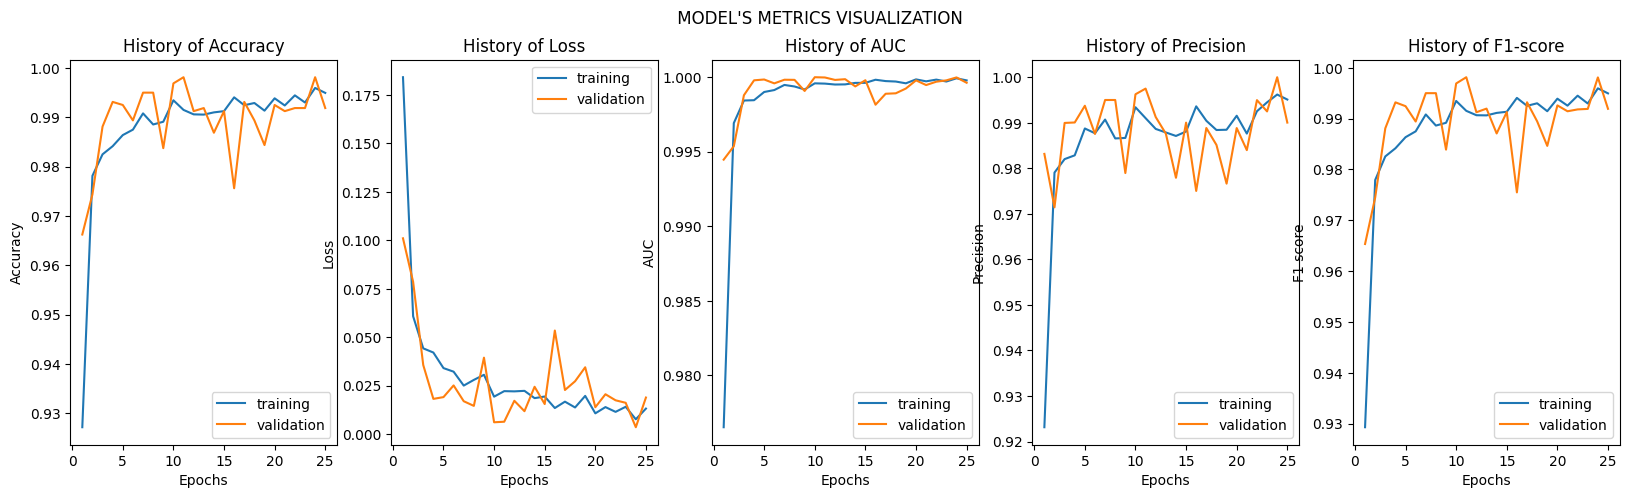

In [33]:
#%% PLOTTING RESULTS (Train vs Validation)

def Train_Val_Plot(acc,val_acc,loss,val_loss,auc,val_auc,precision,val_precision,f1,val_f1):
    
    fig, (ax1, ax2,ax3,ax4,ax5) = plt.subplots(1,5, figsize= (20,5))
    fig.suptitle(" MODEL'S METRICS VISUALIZATION ")

    ax1.plot(range(1, len(acc) + 1), acc)
    ax1.plot(range(1, len(val_acc) + 1), val_acc)
    ax1.set_title('History of Accuracy')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Accuracy')
    ax1.legend(['training', 'validation'])


    ax2.plot(range(1, len(loss) + 1), loss)
    ax2.plot(range(1, len(val_loss) + 1), val_loss)
    ax2.set_title('History of Loss')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Loss')
    ax2.legend(['training', 'validation'])
    
    ax3.plot(range(1, len(auc) + 1), auc)
    ax3.plot(range(1, len(val_auc) + 1), val_auc)
    ax3.set_title('History of AUC')
    ax3.set_xlabel('Epochs')
    ax3.set_ylabel('AUC')
    ax3.legend(['training', 'validation'])
    
    ax4.plot(range(1, len(precision) + 1), precision)
    ax4.plot(range(1, len(val_precision) + 1), val_precision)
    ax4.set_title('History of Precision')
    ax4.set_xlabel('Epochs')
    ax4.set_ylabel('Precision')
    ax4.legend(['training', 'validation'])
    
    ax5.plot(range(1, len(f1) + 1), f1)
    ax5.plot(range(1, len(val_f1) + 1), val_f1)
    ax5.set_title('History of F1-score')
    ax5.set_xlabel('Epochs')
    ax5.set_ylabel('F1 score')
    ax5.legend(['training', 'validation'])


    plt.show()
    

Train_Val_Plot(history.history['accuracy'],history.history['val_accuracy'],
               history.history['loss'],history.history['val_loss'],
               history.history['auc'],history.history['val_auc'],
               history.history['precision'],history.history['val_precision'],
               history.history['f1_score'],history.history['val_f1_score']
              )

In [34]:
score = model.evaluate(test_dataset, verbose = 1) 

print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

31/31 [==============================] - 24s 778ms/step - loss: 0.0310 - accuracy: 0.9894 - precision: 0.9899 - recall: 0.9889 - auc: 0.9988 - f1_score: 0.9894
Test loss: 0.030990608036518097
Test accuracy: 0.9894153475761414


In [35]:
predictions = model.predict(test_dataset,verbose=1)
import numpy as np
class_index = test_dataset.classes
pred = predictions.argmax(axis=1)
print(pred)

31/31 [==============================] - 6s 185ms/step
[1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 0 0 1 1 0 1 1 1 1 0 1 0 1 0 0 0 1 1
 0 0 0 0 0 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 0 1 0 0 1 0 1 1 0 1 0 0 0 0 0 1
 0 0 1 1 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 0 1 1 0 1 1 0 0 0 1 1 0 0 0 0 1 1 0
 0 1 1 0 1 0 0 1 0 0 0 1 0 1 0 1 0 0 1 1 0 1 1 0 0 1 0 0 1 1 1 0 1 1 0 1 1
 1 0 1 1 0 0 0 0 1 1 1 1 1 1 1 0 0 1 0 0 1 1 1 0 1 0 0 1 0 1 1 0 1 1 0 0 0
 1 1 1 1 1 1 0 1 0 0 1 1 0 0 1 0 1 0 0 1 1 0 0 0 0 1 0 1 1 0 0 1 0 0 1 1 0
 1 1 0 1 0 1 0 0 1 1 0 1 0 0 1 0 1 0 0 1 1 1 0 0 0 0 1 1 1 1 1 1 0 1 0 1 0
 0 0 0 0 0 0 0 0 1 0 1 1 1 0 1 1 1 0 1 1 0 0 1 0 0 1 1 0 1 0 1 0 0 1 1 1 1
 1 1 0 0 1 1 1 1 0 0 0 1 1 0 1 0 1 1 0 1 0 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 1
 0 1 0 1 1 1 0 1 1 0 1 0 0 0 0 1 1 1 0 1 0 0 1 0 0 1 1 0 0 1 1 1 0 1 0 0 0
 1 1 0 1 0 1 0 1 1 1 0 0 1 1 0 1 0 0 1 1 1 1 0 0 0 1 0 1 1 0 1 1 1 1 1 0 0
 0 1 1 1 0 1 0 1 1 0 1 0 1 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1
 0 0 1 1 1 0 0 0 0 1 1 1 1 0 1 1 1 0 0 0 0 1 

In [36]:
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix

print(accuracy_score(class_index,pred))

cm = confusion_matrix(class_index,pred)
print(cm)

0.48689516129032256
[[230 253]
 [256 253]]


31/31 [==============================] - 6s 193ms/step


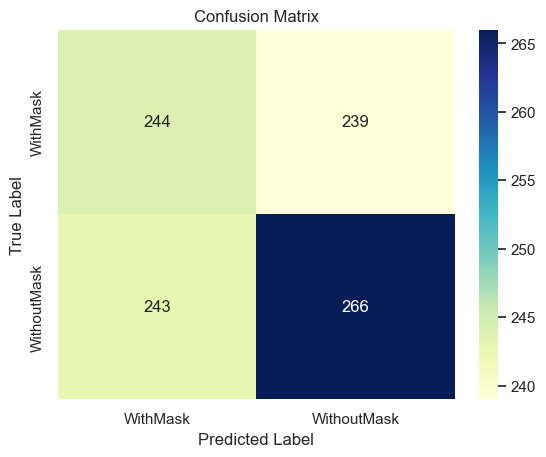

In [37]:
import seaborn as sns 
from sklearn.metrics import confusion_matrix

# Get the true labels and predicted labels for the validation set
validation_labels = test_dataset.classes
validation_pred_probs = model.predict(test_dataset)
validation_pred_labels = np.argmax(validation_pred_probs, axis=1)

# Compute the confusion matrix
confusion_mtx = confusion_matrix(validation_labels, validation_pred_labels)
class_names = list(train_dataset.class_indices.keys())
sns.set()
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='YlGnBu', 
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_6552\128096471.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


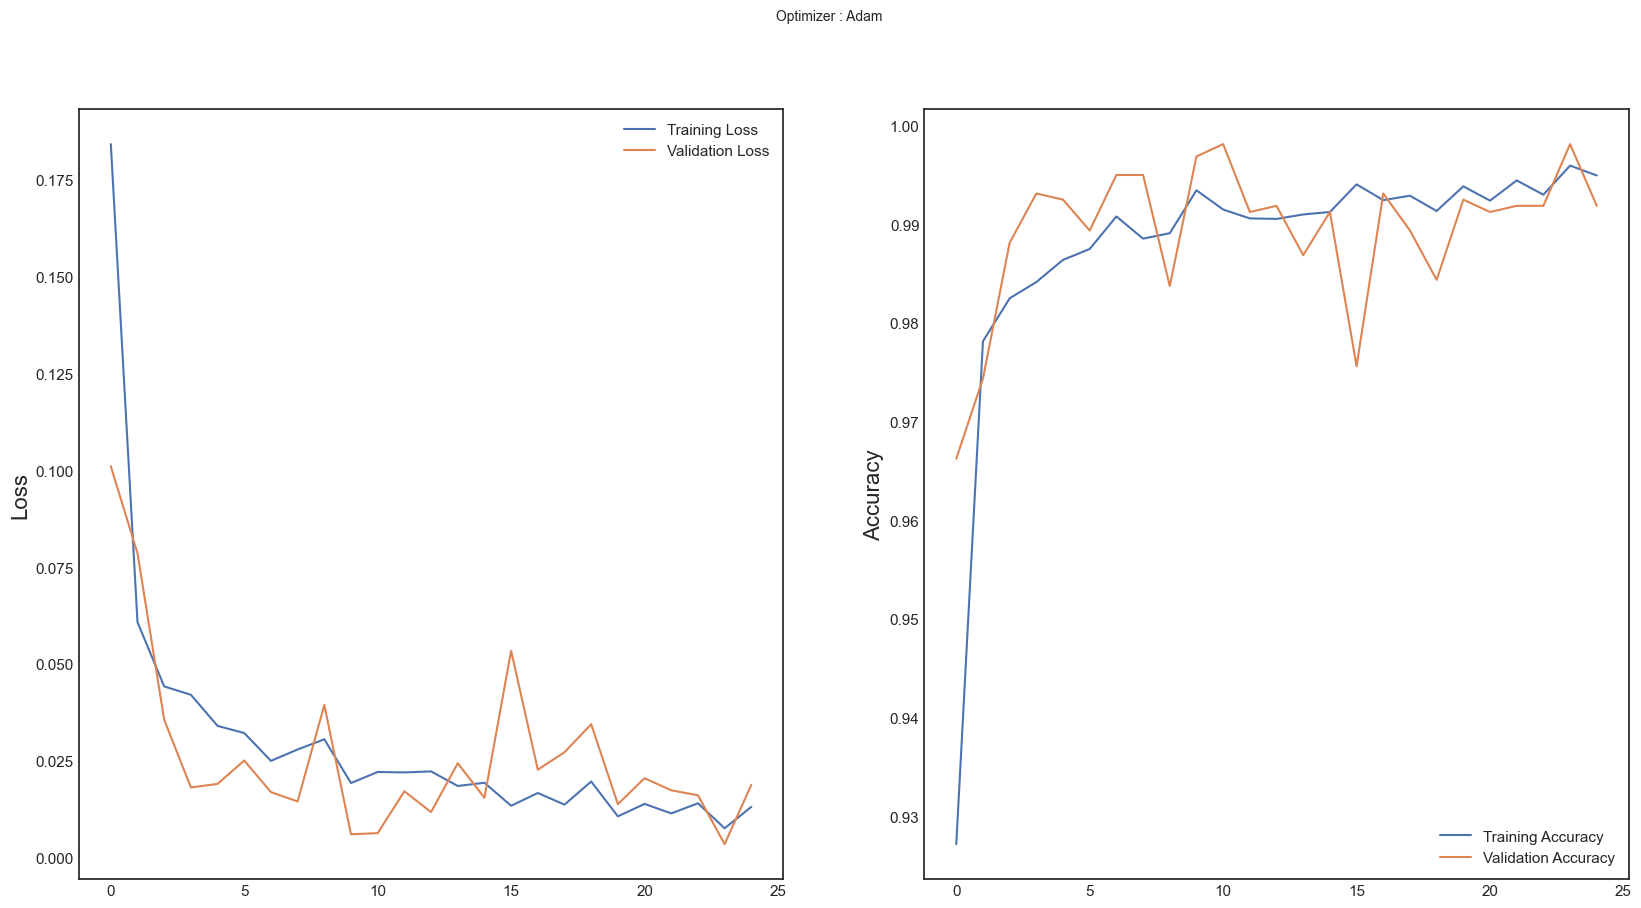

In [38]:
plt.style.use('seaborn-white')

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [39]:
Categories = {0: "With Mask", 1: "With Out Mask"}

In [40]:
import cv2
def prepare(filepath):
    IMG_SIZE = 128
    img_array = cv2.imread(filepath, cv2.IMREAD_COLOR)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE) )
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3)

1/1 [==============================] - 0s 139ms/step
[[0.99681336 0.17881629]]
With Mask
The above type is:
99.68 %  With Mask
17.88 %  With Out Mask


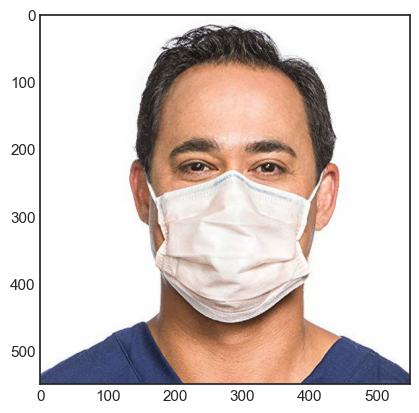

In [41]:
img = plt.imread("ex1.jpg")
plt.imshow(img)
path = "ex1.jpg"
prediction = model.predict(prepare(path)/255)
print(prediction)
label=prediction.argmax()
label
print(Categories[label])
i = 0
print("The above type is:")
for perc in prediction[0]:
    print(round(perc*100, 2),"% ",Categories[i])
    i+= 1

1/1 [==============================] - 0s 25ms/step


Text(0.5, 1.0, 'With Mask')

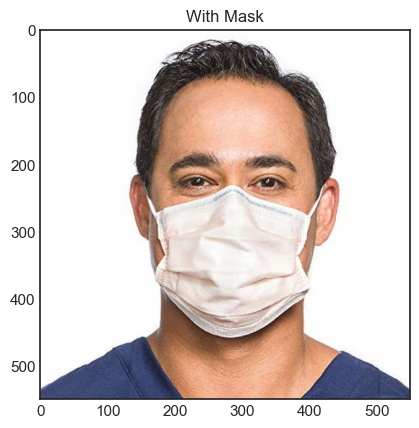

In [42]:
prediction = model.predict(prepare(path)/255)
label = prediction.argmax()
plt.imshow(img)
plt.title(Categories[label])

1/1 [==============================] - 0s 31ms/step
[[0.54444385 0.82932603]]
With Out Mask
The above type is:
54.44 %  With Mask
82.93 %  With Out Mask


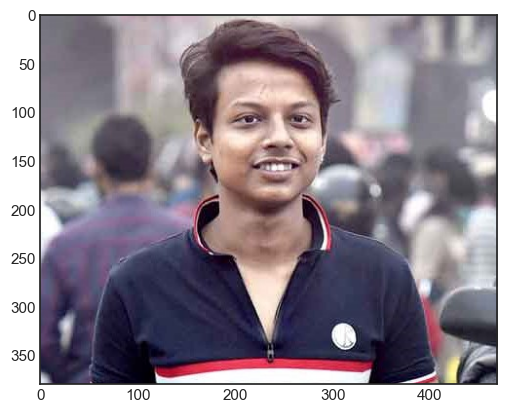

In [45]:
img = plt.imread("ex2.jpg")
plt.imshow(img)
path = "ex2.jpg"
prediction = model.predict(prepare(path)/255)
print(prediction)
label=prediction.argmax()
label
print(Categories[label])
i = 0
print("The above type is:")
for perc in prediction[0]:
    print(round(perc*100, 2),"% ",Categories[i])
    i+= 1

1/1 [==============================] - 0s 26ms/step


Text(0.5, 1.0, 'With Out Mask')

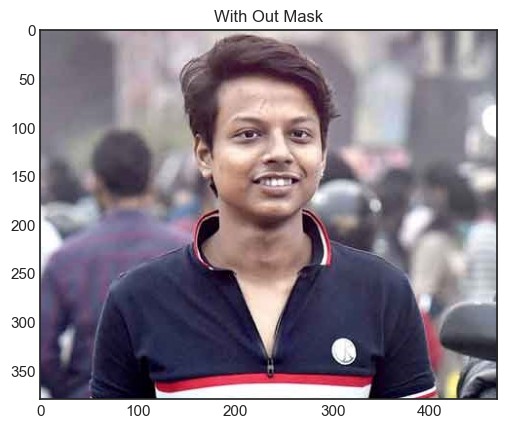

In [46]:
prediction = model.predict(prepare(path)/255)
label = prediction.argmax()
plt.imshow(img)
plt.title(Categories[label])